## Maximum Filter

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@7b00c550

This `Op`, provided a radius `r`, assigns every pixel in the output image with the greatest pixel value contained within its neighborhood (of radius `r`) in the input. Let's see how this `Op` is called:

In [2]:
ij.op().help("filter.max")

Available operations:
	(IterableInterval out) =
	net.imagej.ops.filter.max.DefaultMaxFilter(
		IterableInterval out,
		RandomAccessibleInterval in,
		Shape shape,
		OutOfBoundsFactory outOfBoundsFactory?)

Let's take a look at each of the parameters:

* `IterableInterval out`: the output image
* `RandomAccessibleInterval in`: the input image
* `Shape shape`: The [`Shape`](http://javadoc.scijava.org/ImgLib2/net/imglib2/algorithm/neighborhood/Shape.html) that defines the neighborhood that the `Op` will search to find the maximum value. Note that there are a lot of different shapes to choose from, and this is also where the radius is defined.
* `OutOfBoundsFactory outOfBoundsFactory`: An **optional** parameter that tells the `Op` what to do along the edges of the image. For the purposes of this tutorial we will ignore this parameter.

Let's get an image to apply this filter on. For the purposes of this tutorial we will only take the first channel of the image:

[INFO] Populating metadata
[INFO] Populating metadata


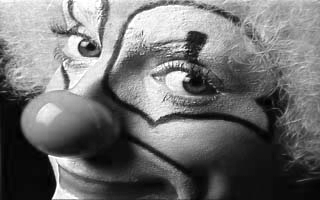

In [3]:
input = ij.scifio().datasetIO().open("http://imagej.net/images/clown.jpg")

//grab the first slice (index 0) from the channel dimension (index 2)
imageToFilter = ij.op().run("hyperSliceView", input, 2, 0)

ij.notebook().display(imageToFilter)

Now we need to create a `Shape`. Let's create a [`HyperSphereShape`](http://javadoc.scijava.org/ImgLib2/net/imglib2/algorithm/neighborhood/HyperSphereShape.html) with radius `3`. We also need to create an output image. Once we have these we can run the filter:

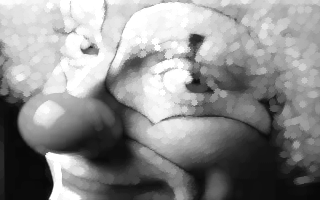

In [4]:
import net.imglib2.algorithm.neighborhood.HyperSphereShape

radius = 3 as int
shape = new HyperSphereShape(radius)

output = ij.op().run("create.img", imageToFilter)
ij.op().filter().max(output, imageToFilter, shape)

ij.notebook().display(output)